Extraction of RGB color channel features from skin signal images

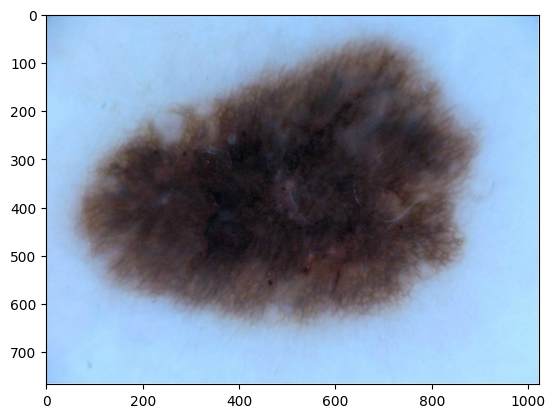

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2 as cv
from iteration_utilities import flatten

# Load an image and show it
img = cv.imread('../../ISIC-2017_Training_Data/ISIC_0000000.jpg',-1) 
mask = cv.imread('../../ISIC-2017_Training_Part1_GroundTruth/ISIC_0000000_segmentation.png',-1)

# Color conversion and normalization
output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
img = cv.normalize(cv.cvtColor(img, cv.COLOR_BGR2RGB),  output_array, 0, 255, cv.NORM_MINMAX) 
plt.imshow(img); 

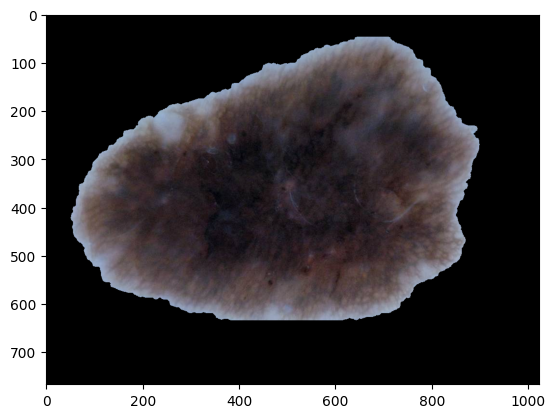

In [2]:
## Segmentation
segmented = cv.bitwise_and(img, img, mask=mask)
plt.imshow(segmented);

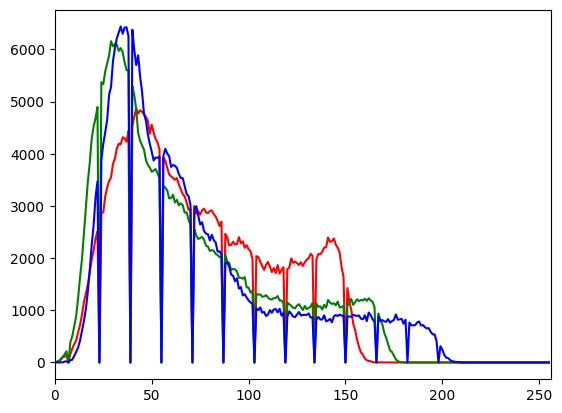

In [3]:
# color channel histogram for segmented region
color = ('r','g','b')
mode_color_channel = [] # Declare list to store the most repeated pixel intensity in each channel, for average and std dev values
avg_color_channel = []
std_color_channel = []


for i,col in enumerate(color):   
    histr = cv.calcHist([segmented],[i],None,[256],[1,256]) # the range should be [1,256] to exclude black background    
    avg = round(segmented[:,:,i].flatten()[segmented[:,:,i].flatten().nonzero()].mean(),2) # average of i channel
    std = round(segmented[:,:,i].flatten()[segmented[:,:,i].flatten().nonzero()].std(),2) # std deviation of i channel
    avg_color_channel.append(avg) # append i color channel average to avg list
    std_color_channel.append(std) # append i color channel std dev to std list
    mode_color_channel.append(list(histr.flatten()).index(max(histr.flatten()))) # append mode to mode list
    plt.plot(histr,color = col)     # add color channel histogram to plot
    plt.xlim([0,256]) # set x axis limit to 0-256 
    
plt.show()

In [4]:
print('Mode: Red: ' + str(mode_color_channel[0]) + ' Green: ' + str(mode_color_channel[1]) + ' Blue: ' + str(mode_color_channel[2]))
print('Average: Red: ' + str(round(avg_color_channel[0],2)) + ' Green: ' + str(round(avg_color_channel[1],2)) + ' Blue: ' + str(round(avg_color_channel[2],2)))
print('Std Dev: Red: ' + str(round(std_color_channel[0],2)) + ' Green: ' + str(round(std_color_channel[1],2)) + ' Blue: ' + str(round(std_color_channel[2],2)))


Mode: Red: 42 Green: 29 Blue: 34
Average: Red: 75.35 Green: 66.82 Blue: 72.6
Std Dev: Red: 38.5 Green: 41.89 Blue: 45.64
